##### MNIST is a known colection of handwritten digits

##### It's use to learn machine learning. Using Pytorch you can use this dataset.

##### **First download deps**

In [3]:
!pip install torch
!pip install numpy

##### **Import deps**

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
import torch.nn.functional as F

from torchvision import datasets, transforms
from torch import optim

##### **Define a function to get the dataset**

In [5]:
def get_data(model):
    # Define a transform to normalize the data
    transform = transforms.Compose([transforms.ToTensor(),
                                  transforms.Normalize((0.5,), (0.5,)),
                                  ])

    # Download and load the training data
    trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

    return trainloader

##### **Define the training function**

In [6]:
def train(model,trainloader):
    epochs = 5
    for e in range(epochs):
        running_loss = 0
        for images, labels in trainloader:
            # Flatten MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)

            optimizer.zero_grad()

            # Forward pass, then backward pass, then update weights
            output = model.forward(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        else:
            print(f"Training loss: {running_loss/len(trainloader)}")


##### **Define a testing function**

In [7]:
def test():
    images, labels = next(iter(trainloader))
    for x in range(5):
        img = images[x].view(1, 784)
        with torch.no_grad():
            logits = model.forward(img)
        ps = F.softmax(logits, dim=1)
        view_classify(img.view(1, 28, 28), ps)

##### **Helper function to display the results from the testing**

In [8]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.show()

##### **Define the model**

In [9]:
#We use 784 as input because the images are 28*28
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

##### **Get the data**

In [10]:
trainloader = get_data(model)

##### **Train the model**

In [11]:
train(model,trainloader)

Training loss: 1.4631191756743103
Training loss: 0.4483850281407584
Training loss: 0.3401391092521041
Training loss: 0.2921474673934201
Training loss: 0.2595908448878509


##### **Test**

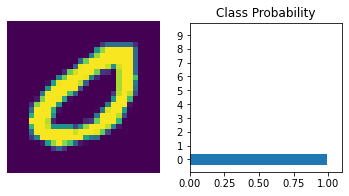

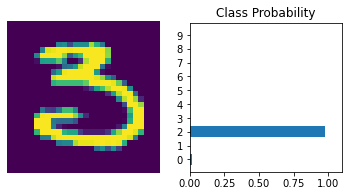

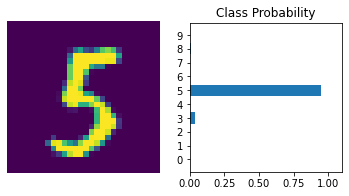

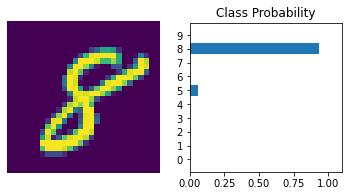

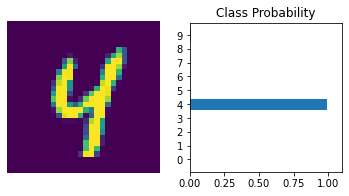

In [12]:
test()

##### **There was a big fail on the second image, actually is a 3 but the model classifies it as a 2**